In [56]:
import numpy as np

In [57]:
import polars as pl

schema_overrides = {
    'tip_amount': pl.Float64,
    'tolls_amount': pl.Float64
}

month_mar_2016 = pl.read_csv('/Users/poppinadityagmail.com/Developer/DataScience_Projects/New_York_Taxi_Price_Prediction/DataSets/yellow_tripdata_2016-03.csv', schema_overrides = schema_overrides)
total_records = month_mar_2016.shape[0]

In [58]:
month_mar_2016.columns

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'RatecodeID',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

# **NYC Taxi Trip Record Data - Column Descriptions**

---

**1. VendorID**  
**Description:** A code indicating the provider associated with the trip record.  

**2. tpep_pickup_datetime**  
**Description:** The date and time when the meter was engaged.  

**3. tpep_dropoff_datetime**  
**Description:** The date and time when the meter was disengaged.  

**4. passenger_count**  
**Description:** The number of passengers in the vehicle (driver-entered value).  

**5. trip_distance**  
**Description:** The elapsed trip distance in miles reported by the taximeter.  

**6. RatecodeID**  
**Description:** The final rate code in effect at the end of the trip.  

**7. store_and_fwd_flag**  
**Description:** Indicates whether the trip record was stored before sending to the vendor.  

**8. PULocationID**  
**Description:** TLC Taxi Zone in which the trip began.  

**9. DOLocationID**  
**Description:** TLC Taxi Zone in which the trip ended.  

**10. payment_type**  
**Description:** A numeric code signifying how the passenger paid for the trip.  

**11. fare_amount**  
**Description:** The time-and-distance fare calculated by the meter.  

**12. extra**  
**Description:** Miscellaneous extras and surcharges (e.g., rush hour and overnight charges).  

**13. mta_tax**  
**Description:** USD 0.50 MTA tax automatically triggered based on the metered rate.  

**14. tip_amount**  
**Description:** Tip amount (automatically populated for credit card payments, cash tips not included).  

**15. tolls_amount**  
**Description:** Total amount of all tolls paid during the trip.  

**16. improvement_surcharge**  
**Description:** USD 0.30 improvement surcharge assessed on hailed trips at flag drop.  

**17. total_amount**  
**Description:** The total amount charged to passengers, including fare, extras, taxes, and tolls.  

**18. congestion_surcharge**  
**Description:** Total amount collected in trip for NYS congestion surcharge.  

**19. airport_fee**  
**Description:** USD 1.25 fee for trips to/from NYC airports.  


---

### **Source:**  
[NYC Taxi & Limousine Commission (TLC)](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

In [59]:
for column in month_mar_2016.columns:
    print(f'Unique values in {column}')
    print(month_mar_2016[column].unique())
    print('\n'+'-' * 60+'\n')

Unique values in VendorID
shape: (2,)
Series: 'VendorID' [i64]
[
	1
	2
]

------------------------------------------------------------

Unique values in tpep_pickup_datetime
shape: (2_462_580,)
Series: 'tpep_pickup_datetime' [str]
[
	"2016-03-25 09:54:04"
	"2016-03-19 11:11:58"
	"2016-03-15 07:00:24"
	"2016-03-05 20:47:14"
	"2016-03-11 03:02:02"
	…
	"2016-03-06 12:50:10"
	"2016-03-14 23:46:05"
	"2016-03-11 09:05:37"
	"2016-03-19 21:14:18"
	"2016-03-05 04:22:23"
]

------------------------------------------------------------

Unique values in tpep_dropoff_datetime
shape: (2_466_342,)
Series: 'tpep_dropoff_datetime' [str]
[
	"2016-03-31 10:32:26"
	"2016-03-10 18:48:10"
	"2016-03-21 07:21:55"
	"2016-03-16 11:56:55"
	"2016-03-06 21:26:20"
	…
	"2016-03-30 15:12:01"
	"2016-03-20 09:34:48"
	"2016-03-28 12:44:10"
	"2016-03-04 10:21:06"
	"2016-03-01 20:43:08"
]

------------------------------------------------------------

Unique values in passenger_count
shape: (10,)
Series: 'passenger_count' 

# ML Problem Formulation 
**Time Series Forecasting and Regression**  
To find the number of pickups in the given location (longitude and latitude) and time.  
In the query region and surrounding points.  
  
**Problem**  
Given a Region in Time Interval Predict Number of PickUps  
If pickup at Time T = x what is the pickup at time T+1 = ?

**Steps**  
NYC Region -> Breakup
   

# Performace Metrics
**Mean Absolute Percentage Error (MAPE)**  
1/n Σ ( | { ( Pt - Pt^ ) / Pt } 100 | ) 
 
**Mean Squared Error (MSE)**  
1/n Σ (( Pt - Pt^ )^2)

# Data Cleaning  
Using univariate analysis we are removing Outliers / Illegitimate values

In [60]:
month_mar_2016.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
1,"""2016-03-01 00:00:00""","""2016-03-01 00:07:55""",1,2.5,-73.976746,40.765152,1,"""N""",-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35
1,"""2016-03-01 00:00:00""","""2016-03-01 00:11:06""",1,2.9,-73.983482,40.767925,1,"""N""",-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.0,0.3,15.35
2,"""2016-03-01 00:00:00""","""2016-03-01 00:31:06""",2,19.98,-73.782021,40.64481,1,"""N""",-73.974541,40.67577,1,54.5,0.5,0.5,8.0,0.0,0.3,63.8
2,"""2016-03-01 00:00:00""","""2016-03-01 00:00:00""",3,10.78,-73.863419,40.769814,1,"""N""",-73.96965,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
2,"""2016-03-01 00:00:00""","""2016-03-01 00:00:00""",5,30.43,-73.971741,40.792183,3,"""N""",-74.17717,40.695053,1,98.0,0.0,0.0,0.0,15.5,0.3,113.8


# Pickup Latitude and Longitude  
The approximate bounding box (latitude and longitude) of New York City (NYC) is:  
	•	Southwest Corner (Min Latitude, Min Longitude): (40.4774, -74.2591)  
	•	Northeast Corner (Max Latitude, Max Longitude): (40.9176, -73.7004)

In [61]:
import polars as pl
import folium

# Define NYC bounding box
min_lat, max_lat = 40.4774, 40.9176
min_lon, max_lon = -74.2591, -73.7004

# Assuming your DataFrame is named "month_mar_2016"
df = month_mar_2016.select(["pickup_latitude", "pickup_longitude"]).drop_nulls()

# Convert to Pandas since Folium doesn't support Polars directly
sampled_df = df.sample(n=500, seed=42).to_pandas()

# Identify outliers
sampled_df["is_outlier"] = ~((sampled_df["pickup_latitude"].between(min_lat, max_lat)) & 
                             (sampled_df["pickup_longitude"].between(min_lon, max_lon)))

# Create NYC map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add points to the map
for _, row in sampled_df.iterrows():
    color = "red" if row["is_outlier"] else "blue"
    folium.CircleMarker(
        location=[row["pickup_latitude"], row["pickup_longitude"]],
        radius=1,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.5
    ).add_to(nyc_map)

# Save and display the map
nyc_map.save("maps/nyc_taxi_map.html")

# Trip Duration  
Maximum allowed trip duration in 24 Hrs is 12 Hrs

In [62]:
import polars as pl
import datetime

# Convert timestamps into Unix Time
def convert_to_unix(s: str) -> float:
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timestamp()

# Function to calculate trip times and speeds
def return_with_trip_times(month_mar_2016):
    month_mar_2016 = month_mar_2016.with_columns([
        pl.col("tpep_pickup_datetime").map_elements(convert_to_unix, return_dtype=pl.Float64).alias("pickup_unix"),
        pl.col("tpep_dropoff_datetime").map_elements(convert_to_unix, return_dtype=pl.Float64).alias("dropoff_unix")
    ])

    # Compute trip duration in minutes
    month_mar_2016 = month_mar_2016.with_columns(
        ((pl.col("dropoff_unix") - pl.col("pickup_unix")) / 60).alias("trip_times")
    )

    # Avoid division by zero: Replace zero trip_times with NaN before calculating Speed
    month_mar_2016 = month_mar_2016.with_columns(
        pl.when(pl.col("trip_times") == 0)
          .then(None)
          .otherwise(pl.col("trip_times"))
          .alias("trip_times")
    )

    # Compute speed (handling division by zero)
    month_mar_2016 = month_mar_2016.with_columns(
        ((60 * pl.col("trip_distance").cast(pl.Float64)) / pl.col("trip_times")).alias("speed")
    )

    return month_mar_2016

# Apply function
month_mar_2016_modified = return_with_trip_times(month_mar_2016)

In [63]:
# Check few records
month_mar_2016_modified.filter(
    (pl.col("trip_times") > 0) & 
    (~pl.col("speed").is_null()) &
    (~(pl.col("speed") == float("inf")))
).head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_unix,dropoff_unix,trip_times,speed
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,"""2016-03-01 00:00:00""","""2016-03-01 00:07:55""",1,2.5,-73.976746,40.765152,1,"""N""",-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,1.4568e9,1.4568e9,7.916667,18.947368
1,"""2016-03-01 00:00:00""","""2016-03-01 00:11:06""",1,2.9,-73.983482,40.767925,1,"""N""",-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.0,0.3,15.35,1.4568e9,1.4568e9,11.1,15.675676
2,"""2016-03-01 00:00:00""","""2016-03-01 00:31:06""",2,19.98,-73.782021,40.64481,1,"""N""",-73.974541,40.67577,1,54.5,0.5,0.5,8.0,0.0,0.3,63.8,1.4568e9,1.4568e9,31.1,38.546624
1,"""2016-03-01 00:00:01""","""2016-03-01 00:16:04""",1,6.2,-73.788773,40.647758,1,"""N""",-73.829208,40.712345,3,20.5,0.5,0.5,0.0,0.0,0.3,21.8,1.4568e9,1.4568e9,16.05,23.17757
1,"""2016-03-01 00:00:01""","""2016-03-01 00:05:00""",1,0.7,-73.958221,40.764641,1,"""N""",-73.967896,40.762901,1,5.5,0.5,0.5,2.0,0.0,0.3,8.8,1.4568e9,1.4568e9,4.983333,8.428094


# Checking for outliers

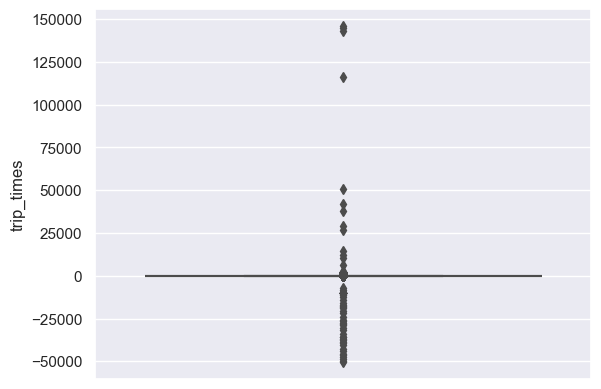

In [64]:
# Calculate the percentiles to remove outliers, and check with BoxPlots
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Polars DataFrame to Pandas for plotting
sns.boxplot(data = month_mar_2016_modified.to_pandas(), y = "trip_times")
plt.show()

In [65]:
deciles = [i / 10 for i in range(1, 11)]

decile_values = month_mar_2016_modified.select([
    pl.col("trip_times").quantile(q).alias(f"{int(q * 100)}th") for q in deciles
])

# Convert to dictionary and print nicely
for col in decile_values.columns:
    value = decile_values[0, col]
    print(f"{col} percentile is {value:.2f}")

10th percentile is 4.03
20th percentile is 5.73
30th percentile is 7.35
40th percentile is 9.03
50th percentile is 10.90
60th percentile is 13.08
70th percentile is 15.85
80th percentile is 19.73
90th percentile is 26.48
100th percentile is 145867.87


In [66]:
deciles = [round(i / 10, 1) for i in range(991, 1001)]

decile_values = month_mar_2016_modified.select([
    pl.col("trip_times").quantile(q / 100).alias(f"{q}th") for q in deciles
])

# Convert to dictionary and print nicely
for col in decile_values.columns:
    value = decile_values[0, col]
    print(f"{col} percentile is {value:.2f}")

99.1th percentile is 56.40
99.2th percentile is 58.22
99.3th percentile is 60.37
99.4th percentile is 63.00
99.5th percentile is 66.25
99.6th percentile is 70.57
99.7th percentile is 76.90
99.8th percentile is 91.15
99.9th percentile is 1423.53
100.0th percentile is 145867.87


In [67]:
print(month_mar_2016_modified.shape)
print(total_records)

(12210952, 23)
12210952


In [68]:
print(month_mar_2016_modified.schema)

Schema([('VendorID', Int64), ('tpep_pickup_datetime', String), ('tpep_dropoff_datetime', String), ('passenger_count', Int64), ('trip_distance', Float64), ('pickup_longitude', Float64), ('pickup_latitude', Float64), ('RatecodeID', Int64), ('store_and_fwd_flag', String), ('dropoff_longitude', Float64), ('dropoff_latitude', Float64), ('payment_type', Int64), ('fare_amount', Float64), ('extra', Float64), ('mta_tax', Float64), ('tip_amount', Float64), ('tolls_amount', Float64), ('improvement_surcharge', Float64), ('total_amount', Float64), ('pickup_unix', Float64), ('dropoff_unix', Float64), ('trip_times', Float64), ('speed', Float64)])


# Data Cleaning Remove Outliers

# Data Cleaning - Trip_times

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


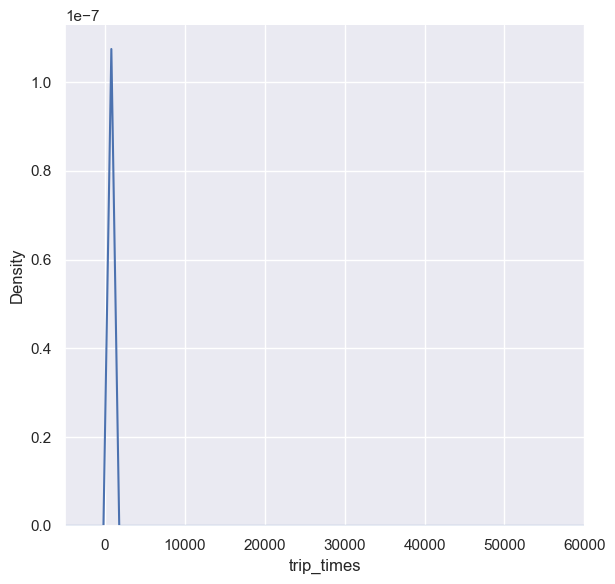

In [69]:
# Ploting PDF
sns.FacetGrid(month_mar_2016_modified.to_pandas(), height = 6)\
    .map(sns.kdeplot, 'trip_times')\
    .add_legend();
plt.xlim(-5000, 60000);
plt.show();

In [70]:
from math import sqrt
month_mar_2016_modified = month_mar_2016_modified.with_columns(pl.col('trip_times').map_elements(lambda x: sqrt(x) if x > 0 else None).alias("log_trip_times"))

/var/folders/xt/dsl_68w51jzftxq18_hpfkhm0000gn/T/ipykernel_21243/1934891793.py:2: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  month_mar_2016_modified = month_mar_2016_modified.with_columns(pl.col('trip_times').map_elements(lambda x: sqrt(x) if x > 0 else None).alias("log_trip_times"))


In [71]:
month_mar_2016_modified['log_trip_times'].tail(100)

log_trip_times
f64
2.683282
3.924283
2.629956
3.408323
4.525852
…
null
340.801091
378.075433


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


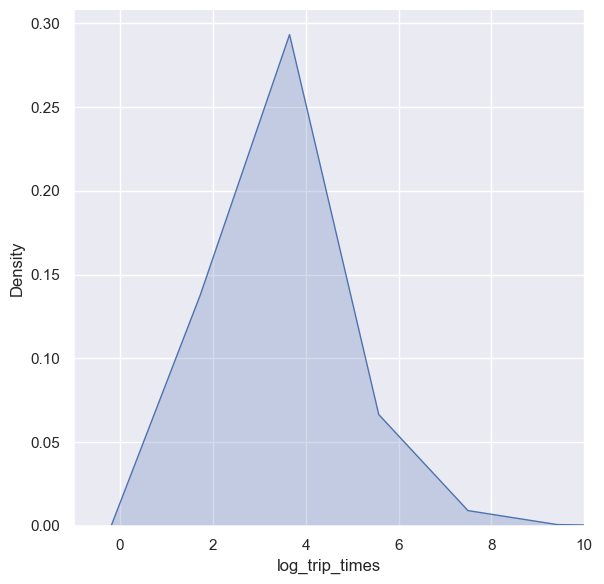

In [72]:
sns.set(style="darkgrid") 
sns.FacetGrid(month_mar_2016_modified.to_pandas(), height = 6)\
    .map(sns.kdeplot, 'log_trip_times', bw_adjust = 1.5, fill = True)\
    .add_legend();
plt.xlim(-1, 10)
plt.show();

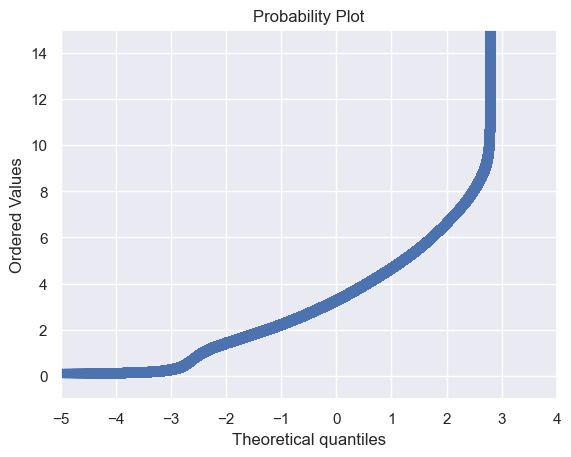

In [73]:
import scipy.stats as scs

scs.probplot(month_mar_2016_modified['log_trip_times'].to_numpy(), plot = plt)
plt.ylim(-1, 15)
plt.xlim(-5, 4)
plt.show()

# Data Cleaning: SPEED

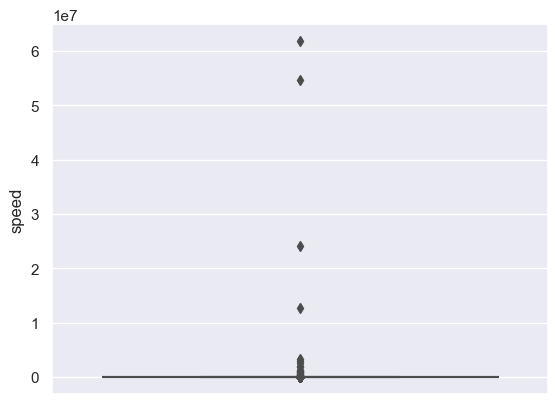

In [74]:
sns.boxplot(month_mar_2016_modified.to_pandas(), y = 'speed');
plt.show()

In [75]:
speed = month_mar_2016_modified["speed"].cast(pl.Float64).drop_nulls().to_numpy()
deciles = list(range(10, 101, 10))
percentile_values = np.percentile(speed, deciles)

for i, val in zip(deciles, percentile_values):
    print(f'{i}th Percentile: {val}')

10th Percentile: 5.832752613240419
20th Percentile: 7.236180904522613
30th Percentile: 8.355555555555556
40th Percentile: 9.416498993963783
50th Percentile: 10.520547945205479
60th Percentile: 11.764705882352942
70th Percentile: 13.30909090909091
80th Percentile: 15.532118887823586
90th Percentile: 19.772885283893398
100th Percentile: 61801497.46174618


In [76]:
percentiles = [i + 90 for i in range(0, 11)]
percentile_values = np.percentile(speed, percentiles)

for j, i in enumerate(range(90, 101)):
    print(f'{i}th Percentile: {percentile_values[j]}')


90th Percentile: 19.772885283893398
91th Percentile: 20.470588235294112
92th Percentile: 21.265822784810126
93th Percentile: 22.174110305510055
94th Percentile: 23.225806451612904
95th Percentile: 24.463768115942027
96th Percentile: 25.957203087326054
97th Percentile: 27.845303867403317
98th Percentile: 30.465215769182798
99th Percentile: 34.71289274106176
100th Percentile: 61801497.46174618


In [77]:
percentiles = [i / 10 for i in range(991, 1001)]
percentile_values = np.percentile(speed, percentiles)

for j, p in enumerate(percentiles):
    print(f'{p}th Percentile: {percentile_values[j]}')

99.1th Percentile: 35.335570469798654
99.2th Percentile: 36.0
99.3th Percentile: 36.77590565102815
99.4th Percentile: 37.672910553253985
99.5th Percentile: 38.73273718286343
99.6th Percentile: 40.0
99.7th Percentile: 41.62499999999999
99.8th Percentile: 44.1
99.9th Percentile: 53.99999999999999
100.0th Percentile: 61801497.46174618


We will exclude everything above 53.00

In [78]:
month_mar_2016_modified = month_mar_2016_modified.filter(
    (pl.col('trip_distance').is_not_null()) &
    (pl.col('speed') >= 0) & 
    (pl.col("speed") <= 54))
speed_record_loss = total_records - month_mar_2016_modified.shape[0]
speed_record_loss

24705

In [79]:
# Average Speed in NYC 
print(month_mar_2016_modified['speed'].mean());

11.879253299126962


**Average Speed is 12 MPH, car travels 2 Miles per 10 Min on an Avg**

# Data Cleaning: DISTANCE

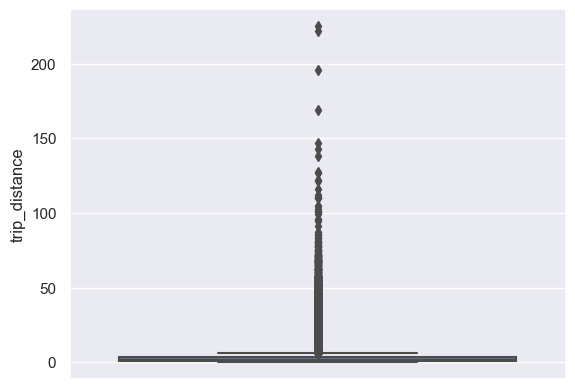

In [80]:
sns.boxplot(month_mar_2016_modified.to_pandas(), y = 'trip_distance');
plt.show()

In [81]:
trip_distances = month_mar_2016_modified["speed"].to_pandas()
deciles = [i * 10 for i in range(1, 11)]
percentile_values = np.percentile(trip_distances, deciles)

for j, i in enumerate(range(10, 101, 10)):
    print(f'{i}th Percentile: {percentile_values[j]}')
    
print('================================================================================================\n')

percentiles = [i + 90 for i in range(0, 11)]
percentile_values = np.percentile(trip_distances, percentiles)

for j, i in enumerate(range(90, 101)):
    print(f'{i}th Percentile: {percentile_values[j]}')
    
print('================================================================================================\n')

percentiles = [i / 10 for i in range(991, 1001)]
percentile_values = np.percentile(trip_distances, percentiles)

for j, p in enumerate(percentiles):
    print(f'{p}th Percentile: {percentile_values[j]}')



10th Percentile: 5.830985915492957
20th Percentile: 7.233184095007382
30th Percentile: 8.352668213457076
40th Percentile: 9.411764705882353
50th Percentile: 10.51460361613352
60th Percentile: 11.755102040816329
70th Percentile: 13.295454545454547
80th Percentile: 15.509881422924902
90th Percentile: 19.71274685816876
100th Percentile: 54.0

90th Percentile: 19.71274685816876
91th Percentile: 20.40485829959514
92th Percentile: 21.17821782178218
93th Percentile: 22.085734364019682
94th Percentile: 23.119266055045873
95th Percentile: 24.338028169014084
96th Percentile: 25.797496170651414
97th Percentile: 27.634437085021165
98th Percentile: 30.164037173908294
99th Percentile: 34.157303370786515
100th Percentile: 54.0

99.1th Percentile: 34.72
99.2th Percentile: 35.343293379257446
99.3th Percentile: 36.01771266859011
99.4th Percentile: 36.78342107841882
99.5th Percentile: 37.681030875556765
99.6th Percentile: 38.74111675126903
99.7th Percentile: 40.0
99.8th Percentile: 41.635650532978865
99.

In [82]:
percentiles = np.round(np.append(np.arange(99.90, 100.0, 0.01), 100.0), 2)

percentile_values = np.percentile(trip_distances, percentiles)

for j, p in enumerate(percentiles):
    print(f'{p:.2f}th Percentile: {percentile_values[j]}')

99.90th Percentile: 44.11449016100179
99.91th Percentile: 44.482339840502846
99.92th Percentile: 44.86754486718004
99.93th Percentile: 45.252288452307226
99.94th Percentile: 45.740145545991126
99.95th Percentile: 46.28211789800061
99.96th Percentile: 46.93116680570997
99.97th Percentile: 47.719373735774056
99.98th Percentile: 48.76786929884275
99.99th Percentile: 50.44990824527476
100.00th Percentile: 54.0


In [83]:
month_mar_2016_modified = month_mar_2016_modified.filter(
    (pl.col('trip_distance').is_not_null()) &
    (pl.col('trip_distance') >= 0) &
    (pl.col('trip_distance') <= 45)
)
trip_distances_record_loss = total_records - month_mar_2016_modified.shape[0]
trip_distances_record_loss

25278

In [84]:
month_mar_2016_modified.head(5)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_unix,dropoff_unix,trip_times,speed,log_trip_times
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,"""2016-03-01 00:00:00""","""2016-03-01 00:07:55""",1,2.5,-73.976746,40.765152,1,"""N""",-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,1.4568e9,1.4568e9,7.916667,18.947368,2.813657
1,"""2016-03-01 00:00:00""","""2016-03-01 00:11:06""",1,2.9,-73.983482,40.767925,1,"""N""",-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.0,0.3,15.35,1.4568e9,1.4568e9,11.1,15.675676,3.331666
2,"""2016-03-01 00:00:00""","""2016-03-01 00:31:06""",2,19.98,-73.782021,40.64481,1,"""N""",-73.974541,40.67577,1,54.5,0.5,0.5,8.0,0.0,0.3,63.8,1.4568e9,1.4568e9,31.1,38.546624,5.576737
1,"""2016-03-01 00:00:01""","""2016-03-01 00:16:04""",1,6.2,-73.788773,40.647758,1,"""N""",-73.829208,40.712345,3,20.5,0.5,0.5,0.0,0.0,0.3,21.8,1.4568e9,1.4568e9,16.05,23.17757,4.006245
1,"""2016-03-01 00:00:01""","""2016-03-01 00:05:00""",1,0.7,-73.958221,40.764641,1,"""N""",-73.967896,40.762901,1,5.5,0.5,0.5,2.0,0.0,0.3,8.8,1.4568e9,1.4568e9,4.983333,8.428094,2.232338


In [85]:
month_mar_2016_modified.shape

(12185674, 24)

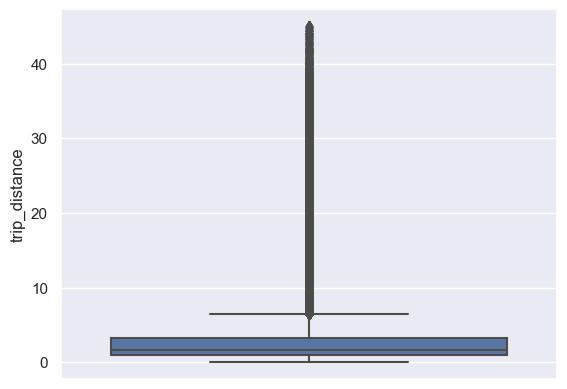

In [86]:
sns.boxplot(data = month_mar_2016_modified.to_pandas(), y = 'trip_distance')
plt.show()

In [87]:
trip_distances = month_mar_2016_modified['trip_distance'].to_pandas()

In [88]:
trip_distances.values.mean()

2.949481088202426

In [89]:
trip_distances.median()

1.7

# Data Cleaning: Fare

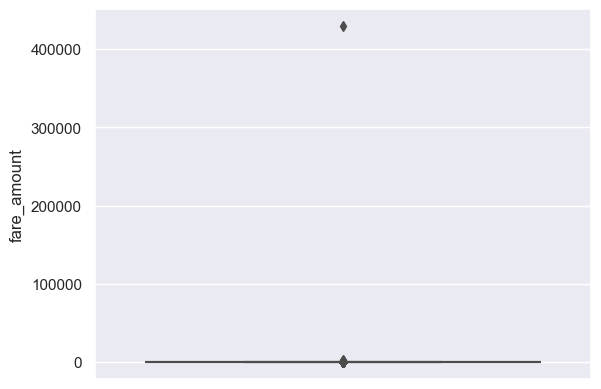

In [90]:
sns.boxplot(month_mar_2016_modified.to_pandas(), y = 'fare_amount')
plt.show()

In [91]:
fares = month_mar_2016_modified['fare_amount'].to_pandas()

deciles = [i * 10 for i in range(1, 11)]
percentile_values = np.percentile(fares, deciles)

for j, i in enumerate(range(10, 101, 10)):
    print(f'{i}th Percentile: {percentile_values[j]}')
    
print('================================================================================================\n')

percentiles = [i + 90 for i in range(0, 11)]
percentile_values = np.percentile(fares, percentiles)

for j, i in enumerate(range(90, 101)):
    print(f'{i}th Percentile: {percentile_values[j]}')
    
print('================================================================================================\n')

percentiles = [i / 10 for i in range(991, 1001)]
percentile_values = np.percentile(fares, percentiles)

for j, p in enumerate(percentiles):
    print(f'{p}th Percentile: {percentile_values[j]}')



10th Percentile: 5.0
20th Percentile: 6.0
30th Percentile: 7.0
40th Percentile: 8.0
50th Percentile: 9.5
60th Percentile: 11.0
70th Percentile: 13.0
80th Percentile: 16.5
90th Percentile: 24.0
100th Percentile: 429496.72

90th Percentile: 24.0
91th Percentile: 25.5
92th Percentile: 27.5
93th Percentile: 29.5
94th Percentile: 31.5
95th Percentile: 34.0
96th Percentile: 38.0
97th Percentile: 45.0
98th Percentile: 52.0
99th Percentile: 52.0
100th Percentile: 429496.72

99.1th Percentile: 52.0
99.2th Percentile: 52.0
99.3th Percentile: 52.0
99.4th Percentile: 52.0
99.5th Percentile: 54.0
99.6th Percentile: 58.0
99.7th Percentile: 63.0
99.8th Percentile: 69.0
99.9th Percentile: 80.0
100.0th Percentile: 429496.72


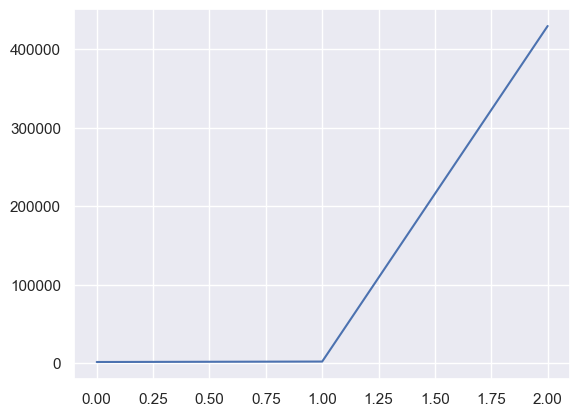

In [92]:
plt.plot(np.sort(fares.values)[-3:])
plt.show()

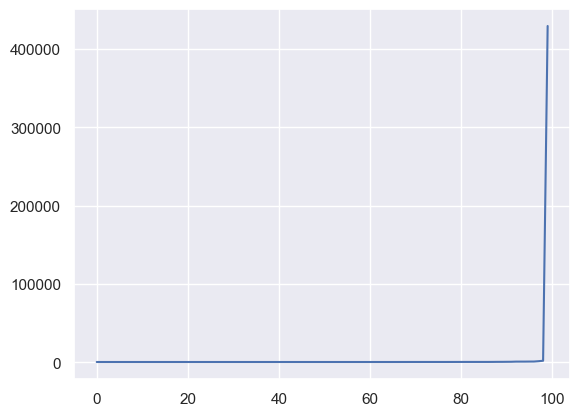

In [93]:
plt.plot(np.sort(fares.values)[-100:])
plt.show()

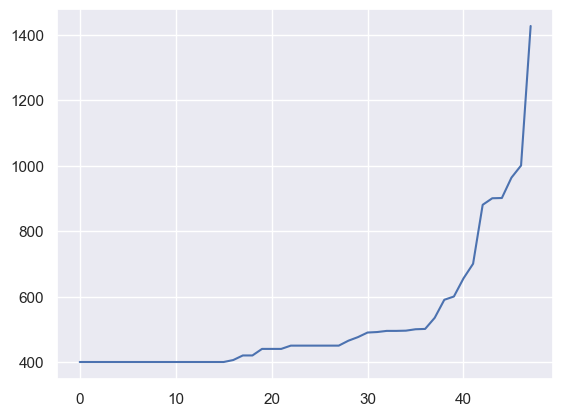

In [94]:
plt.plot(np.sort(fares.values)[-50:-2])
plt.show()

In [95]:
month_mar_2016_modified = month_mar_2016_modified.filter((pl.col('fare_amount') > 0) & (pl.col('fare_amount') <= 1000))
fare_amount_record_loss = total_records - month_mar_2016_modified.shape[0]
fare_amount_record_loss

32651

# Data Cleaning: NYC 

In [96]:
min_lat, max_lat = 40.4774, 40.9176
min_lon, max_lon = -74.2591, -73.7004

month_mar_2016_modified = month_mar_2016_modified.filter((pl.col('pickup_longitude') > min_lon) & (pl.col('pickup_longitude') < max_lon))
month_mar_2016_modified = month_mar_2016_modified.filter((pl.col('pickup_latitude') > min_lat) & (pl.col('pickup_latitude') < max_lat))
month_mar_2016_modified = month_mar_2016_modified.filter((pl.col('dropoff_longitude') > min_lon) & (pl.col('dropoff_longitude') < max_lon))
month_mar_2016_modified = month_mar_2016_modified.filter((pl.col('dropoff_latitude') > min_lat) & (pl.col('dropoff_latitude') < max_lat))

lattitude_longitude_record_loss = total_records - month_mar_2016_modified.shape[0]

In [97]:
print('Records Loss On Outliers Removal')
print('Distance:', trip_distances_record_loss)
print('Speed:', speed_record_loss)
print('Fare Amount:', fare_amount_record_loss)
print('NYC Region Lat vs Long: ', lattitude_longitude_record_loss)

total_records_loss = sum([trip_distances_record_loss, speed_record_loss, fare_amount_record_loss, lattitude_longitude_record_loss])
print('\nTotal Loss:', total_records_loss, 'out of', total_records)

percentage_lost = (total_records_loss * 100) / total_records
percentage_retained = 100 - percentage_lost

print('Percentage Retained:', round(percentage_retained, 3), 'Percentage Lost: ', round(100 - percentage_retained, 3))

Records Loss On Outliers Removal
Distance: 25278
Speed: 24705
Fare Amount: 32651
NYC Region Lat vs Long:  226838

Total Loss: 309472 out of 12210952
Percentage Retained: 97.466 Percentage Lost:  2.534


# Data Preparation and Clustering / Segmentation

In [98]:
from sklearn.cluster import MiniBatchKMeans
import gpxpy.geo # for haversine distance

# Getting coordinates from Polars DataFrame
coords = month_mar_2016_modified.select([
    'pickup_latitude', 'pickup_longitude'
]).to_numpy()

# Will store nice cluster counts for each cluster size
neighbours = []

# Function to compute how many clusters are close to each other (i.e., within 2 miles)
def find_min_distance(cluster_centers, cluster_len):
    less2 = []       # Stores count of close clusters for each center less than 2 Mile
    more2 = []       # Stores count of far clusters for each center greater than 2 Mile
    min_dist = 10000  # Initialize with a large distance (used for tracking minimum)

    for i in range(cluster_len): # For each cluster center
        nice_points = 0  # Clusters with at least one nearby cluster (within 2 miles)
        wrong_points = 0 # Clusters with no nearby clusters
        for j in range(cluster_len): # Compare with every other cluster
            if j == i:
                continue # skip comparing with itself
            
            distance = gpxpy.geo.haversine_distance(
                cluster_centers[i][0], cluster_centers[i][1],
                cluster_centers[j][0], cluster_centers[j][1]
            )
            
            # Convert meters to miles and track minimum inter-cluster distance
            distance_miles = distance / (1.60934 * 1000)
            min_dist = min(min_dist, distance_miles)
            # Count as "nice" if distance is <= 2 Miles
            if distance_miles <= 2:
                nice_points += 1
            else:
                wrong_points += 1
                
        less2.append(nice_points)
        more2.append(wrong_points)
        
    # Store the nice-points data for analysis later
    neighbours.append(less2)
    
    avg_within_2 = np.mean(less2)
    avg_outside_2 = cluster_len - avg_within_2
    
    print('===============================================================================================================')
    print(f"On choosing a cluster size of {cluster_len}")
    print(f"Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): {round(avg_within_2, 2)}\
            {round(100 - (avg_outside_2 * 100 / cluster_len), 2)}%")
    print(f"Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): {round(avg_outside_2, 2)}")
    print(f"Min inter-cluster distance =  {round(min_dist, 3)} Gap {round(min_dist - 0.5 , 2)}")
    
# Function to apply MiniBatchKMeans clustering on pickup coordinates
def find_clusters(increment, dataframe):
    # Initialise and fit MiniBatchKMeans with 'increment' number of clusters
    kmeans = MiniBatchKMeans(
        n_clusters = increment, # Number of clusters to form
        batch_size = 10000,     # Mini-batch size for faster convergence
        random_state = 42,      # For reproducibility
    ).fit(coords)
    
    # Add cluster predictions as a new column to the Polars DataFrame
    dataframe = dataframe.with_columns([
        pl.Series(name = 'pickup_cluster', values = kmeans.predict(coords))
    ])
    
    # Extract the coordinates of cluster centers
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers) # Number of clusters (should be equal to increment)
    
    return cluster_centers, cluster_len

# Loop over different values of K (number of clusters)
for increment in range(10, 100, 10): # for k = 10 -> 100 by 10
    cluster_centers, cluster_len = find_clusters(increment, dataframe = month_mar_2016_modified)
    # Evaluate how tightly packed the clusters are (within 2 miles)
    find_min_distance(cluster_centers, cluster_len)

On choosing a cluster size of 10
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 2.0            20.0%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.0
Min inter-cluster distance =  1.108 Gap 0.61
On choosing a cluster size of 20
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.2            21.0%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 15.8
Min inter-cluster distance =  0.758 Gap 0.26
On choosing a cluster size of 30
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 7.73            25.78%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 22.27
Min inter-cluster distance =  0.4 Gap -0.1
On choosing a cluster size of 40
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 11.8            29.5%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 28.2


In [99]:
# Loop over different values of K (number of clusters)
for increment in range(20, 31): # for k = 20 -> 31 by 2
    cluster_centers, cluster_len = find_clusters(increment, dataframe = month_mar_2016_modified)
    # Evaluate how tightly packed the clusters are (within 2 miles)
    find_min_distance(cluster_centers, cluster_len)

On choosing a cluster size of 20
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.2            21.0%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 15.8
Min inter-cluster distance =  0.758 Gap 0.26
On choosing a cluster size of 21
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.76            22.68%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 16.24
Min inter-cluster distance =  0.617 Gap 0.12
On choosing a cluster size of 22
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.64            21.07%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 17.36
Min inter-cluster distance =  0.617 Gap 0.12
On choosing a cluster size of 23
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 5.39            23.44%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2)

In [100]:
# We choose k = 25 it is close to 0.5-Mile Range with 20.48 % points less than 2.0-Miles Range
cluster_centers, cluster_len = find_clusters(25, dataframe = month_mar_2016_modified)
find_min_distance(cluster_centers, cluster_len)

On choosing a cluster size of 25
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 6.32            25.28%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 18.68
Min inter-cluster distance =  0.504 Gap 0.0


In [101]:
k = 25 # We choose k as 25 from analysis

# Perform MiniBatchKMeans clustering
kmeans = MiniBatchKMeans(n_clusters = k, batch_size = 1000000, random_state = 42).fit(coords)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a folium map centered around the mean of coordinates
map_center = [coords[:, 0].mean(), coords[:, 1].mean()]
map_clusters = folium.Map(location = map_center, zoom_start = 12)

# Add cluster centers to the map
for i, (lat, lon) in enumerate(cluster_centers):
    folium.Marker(
        location = [lat, lon],
        popup = f'Cluster {i + 1}',
        icon = folium.Icon(color = 'blue', icon = 'info-sign')
    ).add_to(map_clusters)
    
map_clusters.save('maps/cluster_center_map_jan.html')
print('Map Exported')

Map Exported


/var/folders/xt/dsl_68w51jzftxq18_hpfkhm0000gn/T/ipykernel_21243/2260306332.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', k)


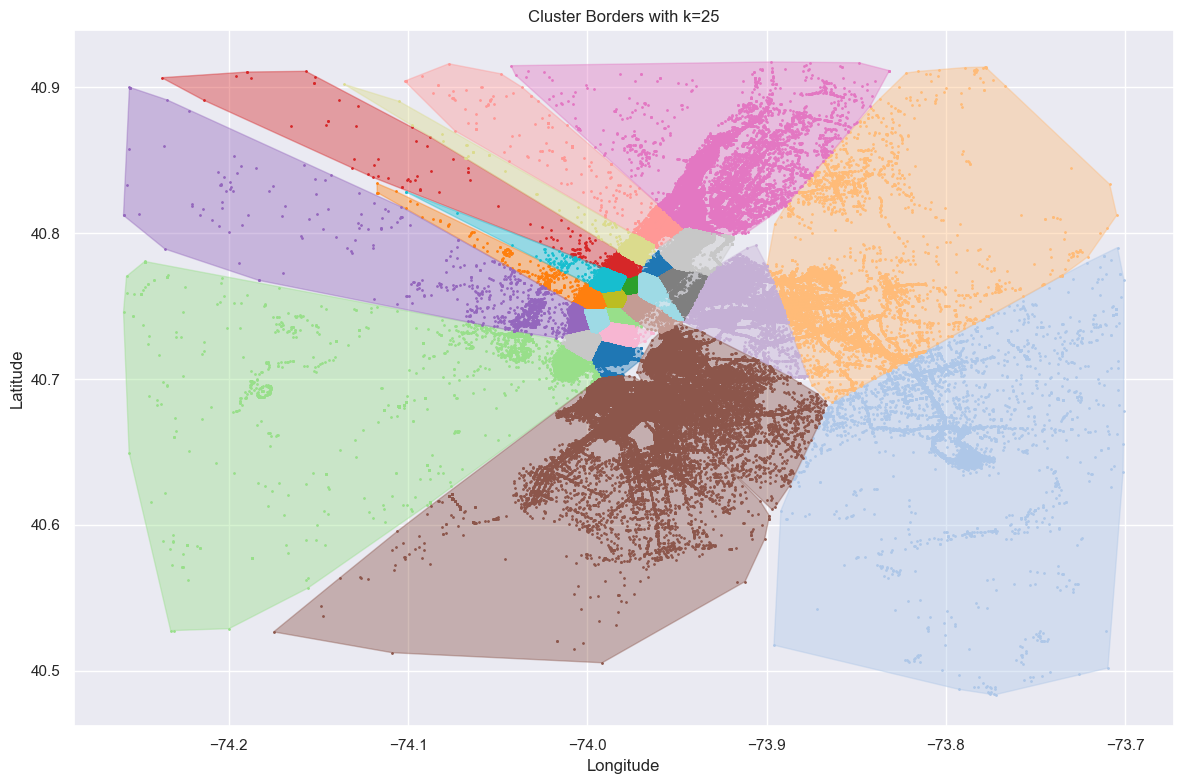

In [102]:
from scipy.spatial import ConvexHull
import matplotlib.cm as cm

labels = kmeans.labels_

# Create color map
colors = cm.get_cmap('tab20', k)

# Plot
plt.figure(figsize = (12, 8))

for i in range(k):
    cluster_points = coords[labels == i]
    
    # Only draw convex hulls if enough points
    if len(cluster_points) >= 3:
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        plt.fill(hull_points[:, 1], hull_points[:, 0], alpha = 0.4, color = colors(i))

    # Scatter the points too
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], s = 1, color = colors(i))
    
month_mar_2016_modified = month_mar_2016_modified.with_columns([
    pl.Series('pickup_cluster', labels)
])
    
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Cluster Borders with k={k}")
plt.grid(True)
plt.tight_layout()
plt.show()

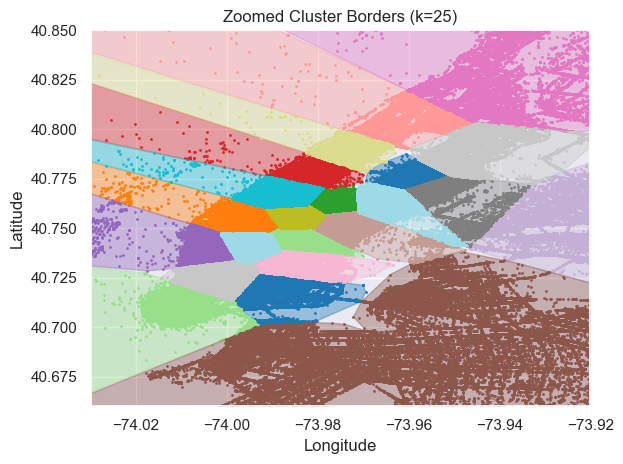

In [103]:
for i in range(k):
    cluster_points = coords[labels == i]

    # Only draw convex hulls if enough points
    if len(cluster_points) >= 3:
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        plt.fill(hull_points[:, 1], hull_points[:, 0], alpha=0.4, color=colors(i))

    # Plot points
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], s=1, color=colors(i))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Zoomed Cluster Borders (k={k})")

# 🔍 Zoom into dense Manhattan region (adjust values based on your data)
plt.xlim(-74.03, -73.92)   # Longitude
plt.ylim(40.66, 40.85)     # Latitude

plt.grid(True)
plt.tight_layout()
plt.show()

# Unix Time Binning

In [104]:
[str(item) for item in month_mar_2016_modified['pickup_unix'][10015:10025]]

['1457577114.0',
 '1457577115.0',
 '1457577116.0',
 '1457577117.0',
 '1457577117.0',
 '1457577117.0',
 '1457577118.0',
 '1457577118.0',
 '1457577118.0',
 '1457577118.0']

In [105]:
month_mar_2016_modified.schema

Schema([('VendorID', Int64),
        ('tpep_pickup_datetime', String),
        ('tpep_dropoff_datetime', String),
        ('passenger_count', Int64),
        ('trip_distance', Float64),
        ('pickup_longitude', Float64),
        ('pickup_latitude', Float64),
        ('RatecodeID', Int64),
        ('store_and_fwd_flag', String),
        ('dropoff_longitude', Float64),
        ('dropoff_latitude', Float64),
        ('payment_type', Int64),
        ('fare_amount', Float64),
        ('extra', Float64),
        ('mta_tax', Float64),
        ('tip_amount', Float64),
        ('tolls_amount', Float64),
        ('improvement_surcharge', Float64),
        ('total_amount', Float64),
        ('pickup_unix', Float64),
        ('dropoff_unix', Float64),
        ('trip_times', Float64),
        ('speed', Float64),
        ('log_trip_times', Float64),
        ('pickup_cluster', Int32)])

In [106]:
def bin_unix_time(df: pl.DataFrame, column_name: str, bin_size_seconds: int) -> pl.DataFrame:
    return df.with_columns([
        (pl.col(column_name) // bin_size_seconds * bin_size_seconds).alias(f'{column_name}_binned')
    ])

# Apply time binning
month_mar_2016_modified = bin_unix_time(month_mar_2016_modified, 'pickup_unix', 600)

# Convert binned seconds to datetime (in milliseconds)
month_mar_2016_modified = month_mar_2016_modified.with_columns(
    (pl.col("pickup_unix_binned") * 1000)
    .cast(pl.Datetime("ms"))
    .alias("pickup_binned_datetime")
)

# Smoothing Time Series Data

*For each cluster total number of 10 min interval binning*

In [107]:
cluster_bin_freq = (
    month_mar_2016_modified
    .select(['pickup_cluster', 'pickup_unix_binned'])
    .unique()
    .group_by('pickup_cluster')
    .agg([
        pl.count().alias('nums_10min_intervals')
    ])
)

total = 0
for row in cluster_bin_freq.iter_rows():
    cluster_id, num_bins = row
    print(f"For cluster {cluster_id}, there are {num_bins} bins.")

For cluster 4, there are 4451 bins.
For cluster 1, there are 4459 bins.
For cluster 10, there are 4461 bins.
For cluster 0, there are 4463 bins.
For cluster 19, there are 4461 bins.
For cluster 24, there are 4458 bins.
For cluster 15, there are 4457 bins.
For cluster 22, there are 4461 bins.
For cluster 11, there are 4460 bins.
For cluster 2, there are 4407 bins.
For cluster 14, there are 4458 bins.
For cluster 8, there are 4456 bins.
For cluster 23, there are 4459 bins.
For cluster 9, there are 4458 bins.
For cluster 3, there are 4460 bins.
For cluster 12, there are 4458 bins.
For cluster 5, there are 4458 bins.
For cluster 17, there are 4457 bins.
For cluster 21, there are 4457 bins.
For cluster 18, there are 4458 bins.
For cluster 13, there are 4429 bins.
For cluster 16, there are 4459 bins.
For cluster 6, there are 4459 bins.
For cluster 20, there are 4459 bins.
For cluster 7, there are 4458 bins.


/var/folders/xt/dsl_68w51jzftxq18_hpfkhm0000gn/T/ipykernel_21243/4293897667.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias('nums_10min_intervals')


# Export the data with required attributes to CSV

# Winsorization of time column

In [108]:
# Calculate lower and upper thresholds for "trip_times" (e.g., 1st and 99th percentile)
lower_threshold = month_mar_2016_modified.select(
    pl.col("trip_times").quantile(0.01).alias("lower_threshold")
).to_series()[0]

upper_threshold = month_mar_2016_modified.select(
    pl.col("trip_times").quantile(0.99).alias("upper_threshold")
).to_series()[0]

print("Lower threshold:", lower_threshold)
print("Upper threshold:", upper_threshold)

# Cap the outliers in "trip_times" by winsorizing, and store the result in a new column "trip_times_capped"
month_mar_2016_modified = month_mar_2016_modified.with_columns(
    pl.when(pl.col("trip_times") < lower_threshold)
      .then(lower_threshold)
      .when(pl.col("trip_times") > upper_threshold)
      .then(upper_threshold)
      .otherwise(pl.col("trip_times"))
      .alias("trip_times_capped")
)

# Optional: Display a few rows to verify the changes
print(month_mar_2016_modified.select(["trip_times", "trip_times_capped"]).head())

Lower threshold: 1.5333333333333332
Upper threshold: 54.61666666666667
shape: (5, 2)
┌────────────┬───────────────────┐
│ trip_times ┆ trip_times_capped │
│ ---        ┆ ---               │
│ f64        ┆ f64               │
╞════════════╪═══════════════════╡
│ 7.916667   ┆ 7.916667          │
│ 11.1       ┆ 11.1              │
│ 31.1       ┆ 31.1              │
│ 16.05      ┆ 16.05             │
│ 4.983333   ┆ 4.983333          │
└────────────┴───────────────────┘


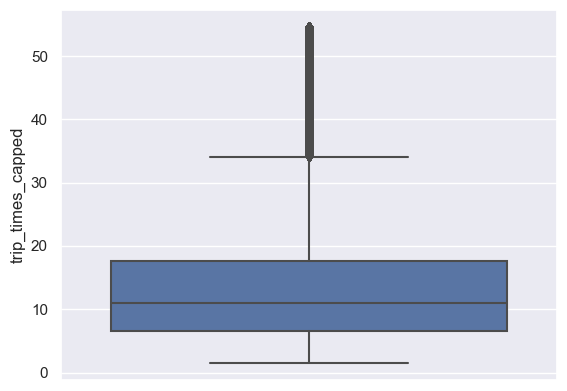

In [109]:
# Calculate the percentiles to remove outliers, and check with BoxPlots
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Polars DataFrame to Pandas for plotting
sns.boxplot(data = month_mar_2016_modified.to_pandas(), y = "trip_times_capped")
plt.show()

In [110]:
month_mar_2016_modified.write_csv('Training_And_Testing/mar_2016.csv')

In [111]:
print('Completed......')

Completed......
